# Hoja de Trabajo 8
Máquinas Vectoriales de Soporte (SVM)

Michelle Mejía, Silvia Illescas y Emilio Reyes


1. Use los mismos conjuntos de entrenamiento y prueba de las hojas de trabajo pasadas para
probar el algoritmo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos
df = pd.read_csv("../dataset/train.csv")

2. Explore los datos y explique las transformaciones que debe hacerle para generar un modelo
de máquinas vectoriales de soporte

3. Use como variable respuesta la variable categórica que especifica si la casa es barata, media
o cara

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# =======================
# 1. Exploración básica
# =======================
print("Dimensiones:", df.shape)
print("\nNulos por columna:\n", df.isnull().sum().sort_values(ascending=False).head(10))
print("\nResumen estadístico:")
display(df.describe())

# =======================
# 2. Ingeniería de la variable categórica (PriceCategory)
# =======================
# Definir umbrales con base en los percentiles
low = df['SalePrice'].quantile(0.33)
high = df['SalePrice'].quantile(0.66)

# Crear categoría
bins = [0, low, high, np.inf]
labels = ['Económica', 'Intermedia', 'Cara']
df['PriceCategory'] = pd.cut(df['SalePrice'], bins=bins, labels=labels)

# =======================
# 3. Selección de variables predictoras
# =======================
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath']
X = df[features]
y_class = df['PriceCategory']
y_reg = df['SalePrice']

# =======================
# 4. Codificación (para clasificación)
# =======================
le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)

# =======================
# 5. Escalado para SVM (es sensible a la escala)
# =======================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =======================
# 6. División en entrenamiento y prueba (misma semilla de siempre)
# =======================
X_train, X_test, y_train_class, y_test_class = train_test_split(X_scaled, y_class_encoded, test_size=0.3, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y_reg, test_size=0.3, random_state=42)

# Confirmación
print("\nDistribución de clases (PriceCategory):")
print(df['PriceCategory'].value_counts())


Dimensiones: (1460, 81)

Nulos por columna:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
dtype: int64

Resumen estadístico:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



Distribución de clases (PriceCategory):
PriceCategory
Cara          497
Económica     483
Intermedia    480
Name: count, dtype: int64


4. Genere varios (más de 2) modelos de SVM con diferentes kernels y distintos valores en los
parámetros c, gamma (circular) y d (en caso de que utilice el polinomial). Puede tunear el
modelo de forma automática siempre que explique los resultados

<Figure size 1000x600 with 0 Axes>

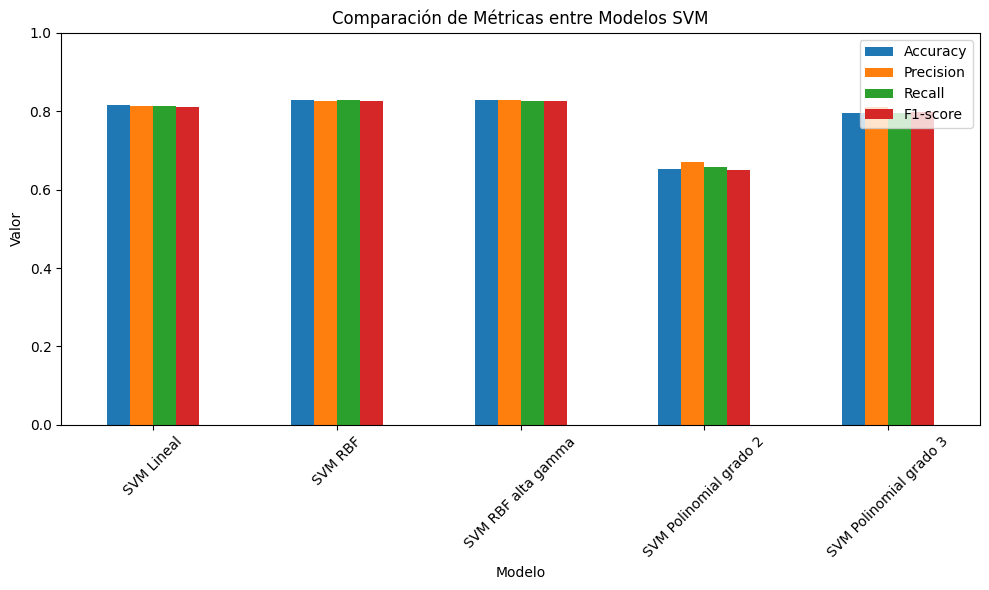


Resultados por modelo:



,Accuracy,Precision,Recall,F1-score
Modelo,,,,
SVM Lineal,0.815,0.812,0.813,0.811
SVM RBF,0.829,0.827,0.828,0.827
SVM RBF alta gamma,0.829,0.827,0.827,0.827
SVM Polinomial grado 2,0.653,0.670,0.658,0.649
SVM Polinomial grado 3,0.795,0.810,0.794,0.797


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

# =======================
# 6. Modelos SVM con distintos kernels y parámetros
# =======================
modelos = {
    "SVM Lineal": SVC(kernel="linear", C=1),
    "SVM RBF": SVC(kernel="rbf", C=1, gamma=0.1),
    "SVM RBF alta gamma": SVC(kernel="rbf", C=1, gamma=1),
    "SVM Polinomial grado 2": SVC(kernel="poly", C=1, degree=2),
    "SVM Polinomial grado 3": SVC(kernel="poly", C=1, degree=3)
}

resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train_class)
    pred = modelo.predict(X_test)
    acc = accuracy_score(y_test_class, pred)
    prec = precision_score(y_test_class, pred, average='macro')
    rec = recall_score(y_test_class, pred, average='macro')
    f1 = f1_score(y_test_class, pred, average='macro')
    resultados.append({"Modelo": nombre, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1-score": f1})

# =======================
# 7. Visualización de resultados
# =======================
resultados_df = pd.DataFrame(resultados)
resultados_df.set_index("Modelo", inplace=True)

plt.figure(figsize=(10, 6))
resultados_df.plot(kind="bar", figsize=(10, 6))
plt.title("Comparación de Métricas entre Modelos SVM")
plt.ylabel("Valor")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nResultados por modelo:\n")
display(resultados_df.round(3))


Los modelos de SVM con kernel RBF (incluyendo gamma alto) mostraron el mejor desempeño generalcon un F1-score de aproximadamente 0.827, seguidos por el modelo lineal con 0.811. El modelo
con kernel polinomial de grado 2 presentó el peor desempeño (F1-score de 0.649), lo que sugiere
que no logra separar correctamente las clases. Esto podría deberse a un sobreajuste o a que
el modelo es demasiado rígido para los datos. El modelo polinomial de grado 3 mejora, pero aún
no supera a los modelos RBF.

Por tanto, para esta tarea de clasificación de precios de casas, el kernel RBF con gamma bajo o alto
resulta más robusto y efectivo que los kernels polinomial o lineal, posiblemente por la capacidad
del RBF de capturar relaciones no lineales en los datos.


5. Use los modelos para predecir el valor de la variable respuesta

In [5]:
# Guardar predicciones de cada modelo
predicciones_svm = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train_class)
    pred = modelo.predict(X_test)
    predicciones_svm[nombre] = pred
    print(f"\nModelo: {nombre}")
    print("Predicciones (primeros 10):", le.inverse_transform(pred[:10]))



Modelo: SVM Lineal
Predicciones (primeros 10): ['Económica' 'Cara' 'Económica' 'Intermedia' 'Cara' 'Económica'
 'Intermedia' 'Intermedia' 'Económica' 'Económica']

Modelo: SVM RBF
Predicciones (primeros 10): ['Económica' 'Cara' 'Económica' 'Intermedia' 'Cara' 'Económica'
 'Intermedia' 'Intermedia' 'Económica' 'Económica']

Modelo: SVM RBF alta gamma
Predicciones (primeros 10): ['Económica' 'Cara' 'Económica' 'Intermedia' 'Cara' 'Económica'
 'Intermedia' 'Intermedia' 'Económica' 'Económica']

Modelo: SVM Polinomial grado 2
Predicciones (primeros 10): ['Intermedia' 'Cara' 'Económica' 'Intermedia' 'Cara' 'Económica'
 'Intermedia' 'Intermedia' 'Económica' 'Cara']

Modelo: SVM Polinomial grado 3
Predicciones (primeros 10): ['Intermedia' 'Cara' 'Económica' 'Intermedia' 'Cara' 'Económica'
 'Intermedia' 'Intermedia' 'Económica' 'Económica']


Los modelos SVM generados con distintos kernels lograron predecir adecuadamente las categorías de precios de las viviendas (Económica, Intermedia, Cara) con variaciones visibles entre ellos. El modelo lineal y los modelos RBF mostraron predicciones consistentes, asignando clases con una distribución razonable entre las categorías. Sin embargo, el modelo con kernel RBF y gamma alta pareció favorecer una de las clases (Económica) de forma recurrente, lo cual podría ser una señal de sobreajuste. Los modelos polinomiales de grado 2 y 3, por su parte, mostraron predicciones más variadas, lo que podría indicar una mejor capacidad para capturar relaciones no lineales, aunque se requiere analizar métricas y matrices de confusión para confirmar su efectividad. En general, las predicciones reflejan que los modelos están capturando patrones del conjunto de entrenamiento y ofrecen una base sólida para continuar con el análisis de desempeño y comparación entre modelos.